# HR ATTRITION DATA 

## The project predicts whether the employees will leave the current company or stay on the basis of given dataset


## - Import the relevant packages
## - Download and explore the dataset
## - Perform EDA, Apply dataset for preprocessing
## - Predict the target columns

In [248]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
#LOADING DATASET
df=pd.read_csv('HR_Attrition.csv')
# WE CAN GET HEAD - FIRST 5
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [250]:
#WE CAN GET TAIL - MEANS LAST 5
df.tail()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8
2939,2940,No,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,...,1,80,0,6,3,4,4,3,1,2


In [251]:
#WE CAN GET NUMBER OF ROWS AND COLUMNS IN DATA
df.shape

(2940, 35)

In [252]:
#WE CAN GET NUMBER OF COLUMNS 
df.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [253]:
# STATISTICAL VIEW ( MEAN, MODE, MEDIAN ETC)
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [254]:
#TO COUNT THE NULL VALUES (EMPTY VALUES)
df.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [255]:
#TO CHECK THE DATA TYPE
df.dtypes

EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [256]:
#Get the values from attriation column from dataset
df['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [257]:
#TO CHECK THE STATISTICAL VIEW (T) REFERS TO TRANSPOSE 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


In [258]:
#UNIQUE ITEMS NUMBERS OF EVERY COLUMN
df.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [259]:
#to check if duplicate data is present
duplicate_data= df[df.duplicated()]
duplicate_data

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## EXPLORATORY DATA ANALYSIS :-

In [260]:
attrition_count = pd.DataFrame(df['Attrition'].value_counts())
attrition_count

,Attrition
No,2466
Yes,474


Text(0.5, 1.0, 'Employee Attrition Probablity')

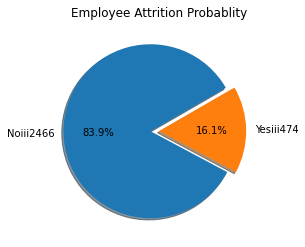

In [261]:
#VISUALIZATION USING PIE CHART TO CHECK PROBABLITY

plt.pie(attrition_count['Attrition'],labels =attrition_count.to_string(header=False).replace(" ","i").split('\n'),
       explode=(0.1,0),startangle=30,autopct= '%1.1f%%', shadow=True,
       )
plt.title('Employee Attrition Probablity')

C:\Users\RITESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

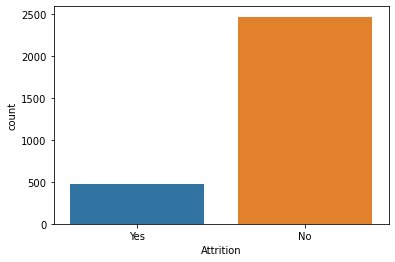

In [262]:
#VISUALIZATION USING COUNT PLOT

sns.countplot(df['Attrition'])

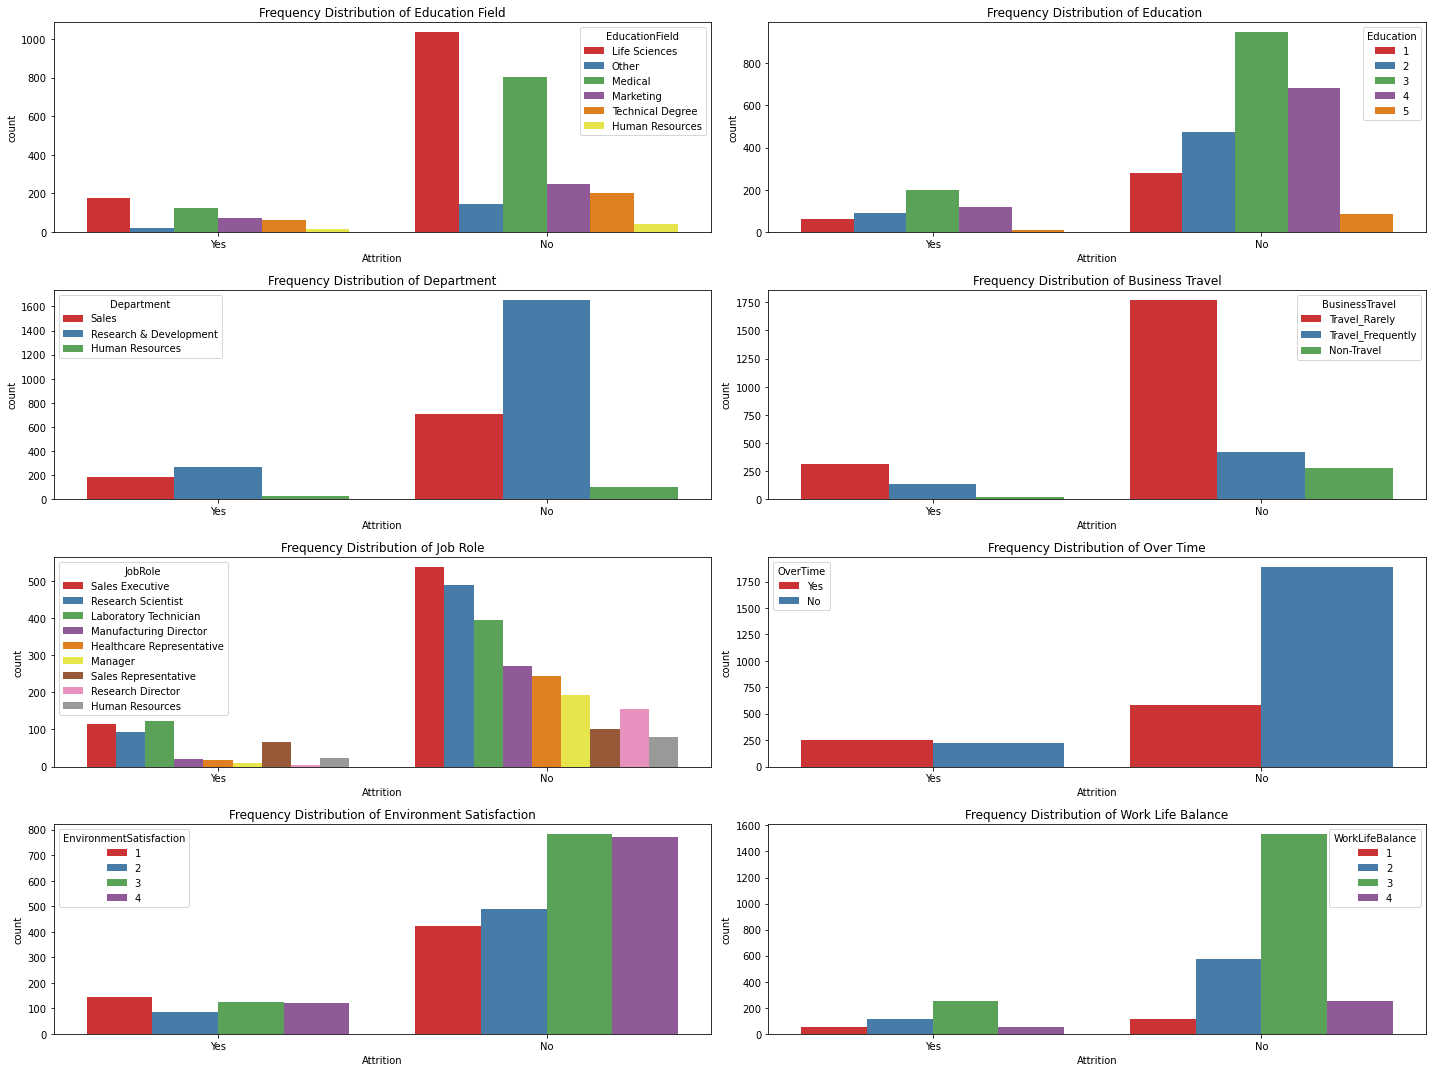

In [263]:
#FREQUENCY DISTRUBTION FOR CATAGEORICAL VALUES TO ATTRITION

f, ax=plt.subplots(4,2, figsize=(20,15))
ax[0,0]=sns.countplot(x='Attrition',hue='EducationField',data=df, ax= ax[0,0], palette='Set1')
ax[0,0].set_title("Frequency Distribution of Education Field")

ax[1,0]=sns.countplot(x='Attrition',hue='Department',data=df, ax= ax[1,0], palette='Set1')
ax[1,0].set_title("Frequency Distribution of Department")

ax[0,1]=sns.countplot(x='Attrition',hue='Education',data=df, ax= ax[0,1], palette='Set1')
ax[0,1].set_title("Frequency Distribution of Education ")

ax[1,1]=sns.countplot(x='Attrition',hue='BusinessTravel',data=df, ax= ax[1,1], palette='Set1')
ax[1,1].set_title("Frequency Distribution of Business Travel")

ax[2,0]=sns.countplot(x='Attrition',hue='JobRole',data=df, ax= ax[2,0], palette='Set1')
ax[2,0].set_title("Frequency Distribution of Job Role")

ax[2,1]=sns.countplot(x='Attrition',hue='OverTime',data=df, ax= ax[2,1], palette='Set1')
ax[2,1].set_title("Frequency Distribution of Over Time")

ax[3,0]=sns.countplot(x='Attrition',hue='EnvironmentSatisfaction',data=df, ax= ax[3,0], palette='Set1')
ax[3,0].set_title("Frequency Distribution of Environment Satisfaction")

ax[3,1]=sns.countplot(x='Attrition',hue='WorkLifeBalance',data=df, ax= ax[3,1], palette='Set1')
ax[3,1].set_title("Frequency Distribution of Work Life Balance")

f.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='count'>

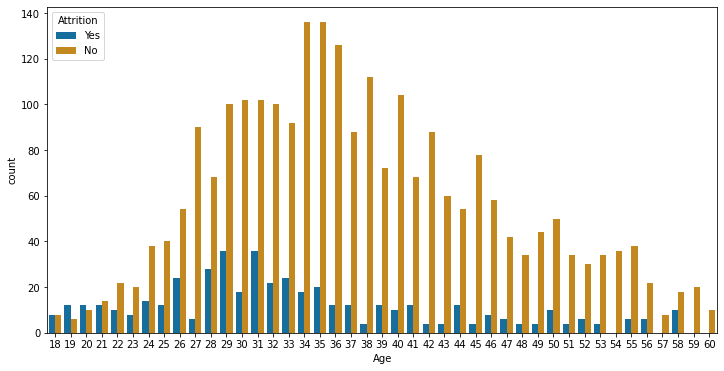

In [264]:
#EMPLOYES THAT LEFT / STAYED AS PER THE AGE

fig_dims= (12,6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Age',hue='Attrition',data= df, palette='colorblind')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

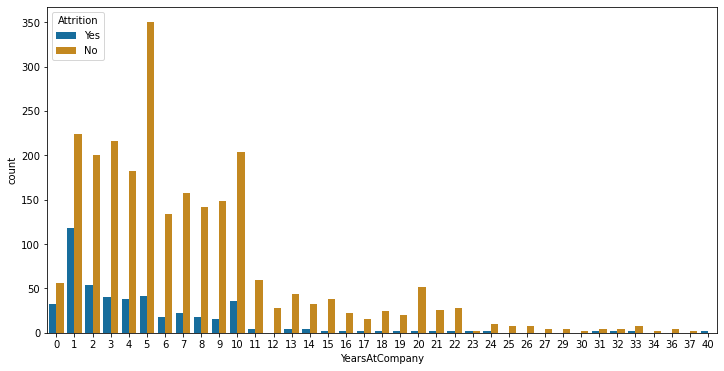

In [265]:
plt.subplots(figsize=(12,6))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df, palette='colorblind')

In [266]:
#DATA TYPES AND VALUES

for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('------------*----------*----------*---------*----------')

Attrition:['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
------------*----------*----------*---------*----------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
------------*----------*----------*---------*----------
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
------------*----------*----------*---------*----------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
------------*----------*----------*---------*----------
Gender:['Female' 'Male']
Male      1764
Female

In [267]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [268]:
df['StandardHours'].unique()
df['EmployeeNumber'].unique()

array([   1,    2,    3, ..., 2938, 2939, 2940], dtype=int64)

In [269]:
# TO DROP UNWANTED COLUMNS WHICH ARE NOT NEEDED

df=df.drop('Over18',axis=1)
df=df.drop('EmployeeCount',axis=1)
df=df.drop('EmployeeNumber',axis=1)
df=df.drop('StandardHours',axis=1)

In [270]:
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
2936,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
2937,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
2938,No,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [271]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [272]:
# CORRELATIONS OF THE COLUMNS

df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

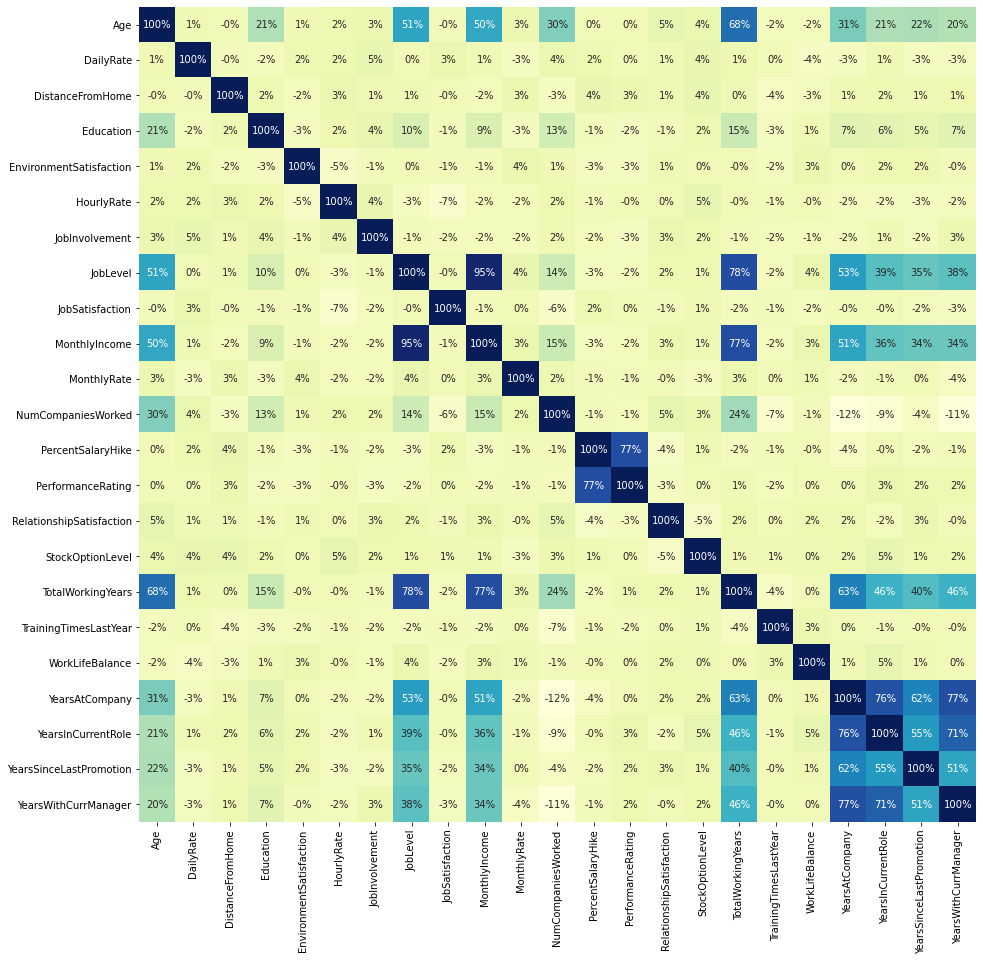

In [273]:
#VISUALIZE THE CORRELATION USING HEATMAP -

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt= '.0%', cmap='YlGnBu',cbar=False)

# DATA PREPROCESSING :-

In [274]:
# TRANSFORM FROM NON NUMERICAL COLUMNS INTO NUMERICAL COLUMNS

from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-274-edf9eeddd10a>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [275]:
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,23,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,0,31,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,1,19,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,0,15,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,0,9,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,18,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
2936,0,21,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
2937,0,9,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
2938,0,31,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


In [276]:
# WE CREATED A NEW COLUMN 

df['Age_Years'] = df['Age']

# WE DROP THE AGE COLUMN

df=df.drop('Age',axis=1)

In [277]:
# DATA
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
2936,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
2937,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
2938,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


In [278]:
#SPLIT THE DATASET INTO INDEPENDENT 'X' & DEPENDENT 'Y' VARIABLES
x=df.iloc[:, 1:df.shape[1]].values
y=df.iloc[:, 0].values

In [279]:
print(df.shape)
print(x.shape)

(2940, 31)
(2940, 30)


In [280]:
# SPLIT THE DATASET INTO 75% TRAINING AND 25% TESTING
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=101)

# BUILD USING RANDOM FOREST CLASSIFICATION ALGORITHM

In [281]:
# USE RFC ALOGORITHM 
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=101)
forest.fit(x_train, y_train)
y_pred=forest.predict(x_test)

In [282]:
#GET THE ACCURACY OF TRAINING DATA
forest.score(x_train, y_train)

0.9931972789115646

In [283]:
#HERE'S THE ACCURACY USING ABSOLUTE SCORE *100
score=forest.score(x_train, y_train)
print('Random Forest Classification :', np.abs(score)*100)

Random Forest Classification : 99.31972789115646


In [284]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [285]:
#SHOW THE CONFUSION MATRIX NAD ACCURACY TO TEST MODEL
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,forest.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Testing Accuracy is:', (TP+TN)/(TN+TP+FN+FP))

[[624   2]
 [ 39  70]]
Model Testing Accuracy is: 0.9442176870748299


In [286]:
#misclassification rate  tells us the percentage of observations incorrectly predicted by model
print('Misclassification Rate:',(FP+FN)/(TN+TP+FN+FP))

#ratio of correctly classified positive samples 
print('Precission Rate:',(TP)/(TP+FP))

# fraction of the relevant documents that are successfully retrieved 
print('Recall Rate:',(TP)/(TP+FN))

Misclassification Rate: 0.055782312925170066
Precission Rate: 0.9722222222222222
Recall Rate: 0.6422018348623854


# Model Accuracy is 94.42%

 BY RITESH PRAJAPATI....